In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
df_selection = pd.read_csv('/content/drive/MyDrive/TESIS_PYTHON/PSICOLÓGICO/balanced_psico_selection.csv')
df_test = pd.read_csv('/content/drive/MyDrive/TESIS_PYTHON/PSICOLÓGICO/psico_test.csv')

In [4]:
#Dividiendo los datos en x e y
x_train = df_selection.drop(['Diagnostico'], axis=1)
y_train = df_selection['Diagnostico']


In [5]:
#Dividiendo el dataset de prueba
x_test = df_test.drop(['Diagnostico'], axis=1)
y_test = df_test['Diagnostico']

**Algoritmos para clasificacion:**</br> **Maquina de vectores de soporte**

In [6]:
#Realizando Máquina de Vectores de Soporte y entrenando
from sklearn.svm import SVC
SupportVectorMachine=SVC()
SupportVectorMachine.fit(x_train,y_train)

SVC()

In [7]:
x_test = x_test[['s_academica','c_espacios']]

In [8]:
#Calculando las predicciones con el modelo entrenado y
#con los valores de prueba de x
import time #Módulo
start_time = time.time()
predictions_svm = SupportVectorMachine.predict(x_test)
total_time = time.time() - start_time 
print(predictions_svm)

[1 0 1 1 1 0 0 1 0 0 1 1 1 0 0 0 1 0 0 0 0 1 0 0 1 1 0 0 1 1 0 0 1 0 0 1 1
 1 0 0 0 0 1 0 0 0 0 0 0 1 1 0 0 0 0 0 1 0 1 1 1 0 1 0 1]


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


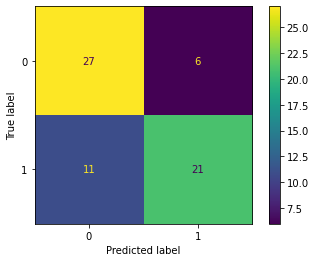

In [9]:
#Creando la matriz de confusion
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(SupportVectorMachine, x_test, y_test)
plt.show()

In [10]:
#Imprimiendo las métricas de evaluación
from sklearn.metrics import accuracy_score  
from sklearn.metrics import precision_score 

#Muestra las estadísticas entre los valores reales(y_test) y las predicciones
print("\nAccuracy:  ",accuracy_score(y_test, predictions_svm)) 
print("\nPrecision:  ",precision_score(y_test, predictions_svm))
print("\nLlevó {} segundos en total.".format(total_time))


Accuracy:   0.7384615384615385

Precision:   0.7777777777777778

Llevó 0.005457878112792969 segundos en total.


**K Vecinos más cercanos**

In [11]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=3)

In [12]:
start_time = time.time()
predictions_knn = knn.predict(x_test)
total_time = time.time() - start_time  
print(predictions_knn)

[1 0 0 1 0 0 0 1 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 1 0 0 1 0 0 1 1
 1 0 0 0 0 1 0 0 0 0 0 0 1 1 0 0 0 0 0 1 0 1 0 1 0 1 0 0]


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


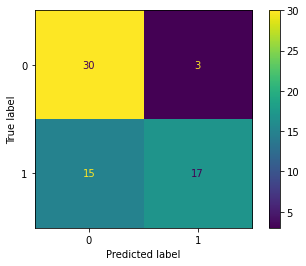

In [13]:
plot_confusion_matrix(knn, x_test, y_test)
plt.show()

In [14]:
#Muestra las estadísticas entre los valores reales(y_test) y las predicciones
print("Accuracy:  ",accuracy_score(y_test, predictions_knn)) 
print("\nPrecision:  ",precision_score(y_test, predictions_knn))
print("\nLlevó {} segundos en total.".format(total_time))

Accuracy:   0.7230769230769231

Precision:   0.85

Llevó 0.0075719356536865234 segundos en total.


**Árboles de decisiones**

In [15]:
from sklearn import tree
tr = tree.DecisionTreeClassifier(max_depth=10)
tr.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=10)

In [16]:
start_time = time.time()
predictions_tr = tr.predict(x_test)
total_time = time.time() - start_time  
print(predictions_knn)

[1 0 0 1 0 0 0 1 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 1 0 0 1 0 0 1 1
 1 0 0 0 0 1 0 0 0 0 0 0 1 1 0 0 0 0 0 1 0 1 0 1 0 1 0 0]


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


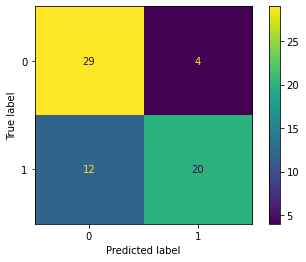

In [17]:
plot_confusion_matrix(tr, x_test, y_test)
plt.show()

In [18]:
#Muestra las estadísticas entre los valores reales(y_test) y las predicciones
print("\nAccuracy:  ",accuracy_score(y_test, predictions_tr)) 
print("\nPrecision:  ",precision_score(y_test, predictions_tr))
print("\nLlevó {} segundos en total.".format(total_time))


Accuracy:   0.7538461538461538

Precision:   0.8333333333333334

Llevó 0.0032570362091064453 segundos en total.


Validación Cruzada con SVM

In [19]:
from sklearn.model_selection import cross_val_score
SupportVectorMachine.fit(x_train,y_train)
print(SupportVectorMachine.score(x_test,y_test))
print(cross_val_score(SupportVectorMachine, x_test,y_test, cv=5).mean())

0.7384615384615385
0.6307692307692307


Validación Cruzada con KNN

In [20]:
knn.fit(x_train,y_train)
print(knn.score(x_test,y_test))
print(cross_val_score(knn, x_test,y_test, cv=5).mean())

0.7230769230769231
0.6000000000000001


Validación Cruzada con Arbol

In [21]:
tr.fit(x_train,y_train)
print(tr.score(x_test,y_test))
print(cross_val_score(tr, x_test, y_test, cv=5).mean())

0.7538461538461538
0.6
